# Sleep Health EDA
Does Age and Gender affect Sleep Health when comparing these factors to Sleep Duration and Quality of Sleep?
Data Source: Sleep Health & Lifestyle Dataset​ 

In [81]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

#display csv
df = pd.read_csv("Sleep_health_and_lifestyle_dataset.csv")

df.head()


,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
0,1,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,None
1,2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,None
2,3,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,None
3,4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
4,5,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea


In [84]:
#Remove paticipants with sleep disorders:
df = df[df['Sleep Disorder'] == 'None']
df.head()

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
0,1,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,None
1,2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,None
2,3,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,None
7,8,Male,29,Doctor,7.8,7,75,6,Normal,120/80,70,8000,None
8,9,Male,29,Doctor,7.8,7,75,6,Normal,120/80,70,8000,None


# Analyze the duration of sleep (longest duration and shortest duration) based on age and gender
The data shows that the average age for the longest sleep duration is 52.46 and the average age for the shortest is 32.88. Female participants obtained the longest duration and male participants obtained the shortest sleep duration. I think based on these factors you can assume that one gender averages longer duration of sleep over the other and that gender is female.

In [85]:
# Find the longest sleep duration
longest_sleep_duration = df['Sleep Duration'].max()
longest_sleepers = df[df['Sleep Duration'] == longest_sleep_duration]

# Find the shortest sleep duration
shortest_sleep_duration = df['Sleep Duration'].min()
shortest_sleepers = df[df['Sleep Duration'] == shortest_sleep_duration]

# Calculate the average age for the longest and shortest sleep duration
average_age_longest_sleepers = longest_sleepers['Age'].mean()
average_age_shortest_sleepers = shortest_sleepers['Age'].mean()


print(f"Average age for the longest sleep duration: {average_age_longest_sleepers:.2f}")
print(f"Average age for the shortest sleep duration: {average_age_shortest_sleepers:.2f}")

Average age for the longest sleep duration: 52.46
Average age for the shortest sleep duration: 32.88


In [87]:
# Get the gender of longest and shortest sleepers
gender_longest_sleepers = longest_sleepers['Gender'].values[0]
gender_shortest_sleepers = shortest_sleepers['Gender'].values[0]

# Display the results
print(f"Gender with the longest sleep duration: {gender_longest_sleepers}")
print(f"Gender with the shortest sleep duration: {gender_shortest_sleepers}")

Gender with the longest sleep duration: Female
Gender with the shortest sleep duration: Male


In [89]:
gender_counts = df['Gender'].value_counts()

# Print the results
print("Number of Males:", gender_counts['Male'])
print("Number of Females:", gender_counts['Female'])

Number of Males: 137
Number of Females: 82


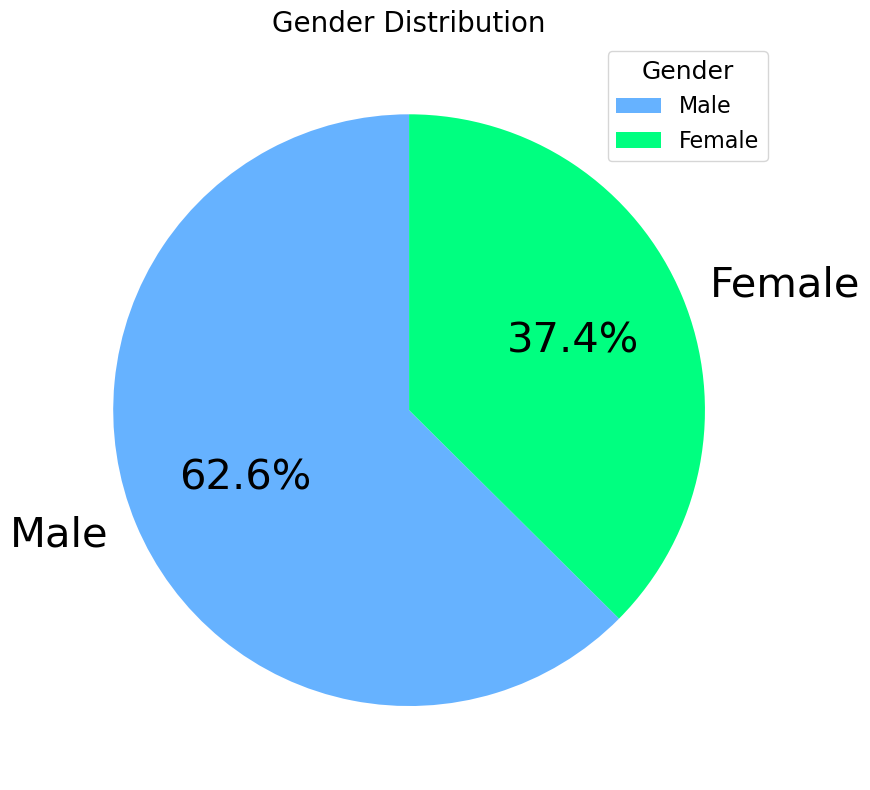

In [97]:
male_count = len(df[df['Gender'] == 'Male'])
female_count = len(df[df['Gender'] == 'Female'])

# Define custom colors for Male and Female
colors = ['#66B2FF', '#00FF80']

# Plot the pie chart with defined colors for the gender distribution
fig, ax = plt.subplots(figsize=(10, 8))
ax.pie([male_count, female_count], labels=['Male', 'Female'], colors=colors, autopct='%1.1f%%', startangle=90, textprops={'fontsize': 30})

# Set the title
ax.set_title('Gender Distribution', fontsize=20)

# Set the legend font size and title font size
ax.legend(fontsize=16, title='Gender', title_fontsize=18)

plt.tight_layout()
plt.show()

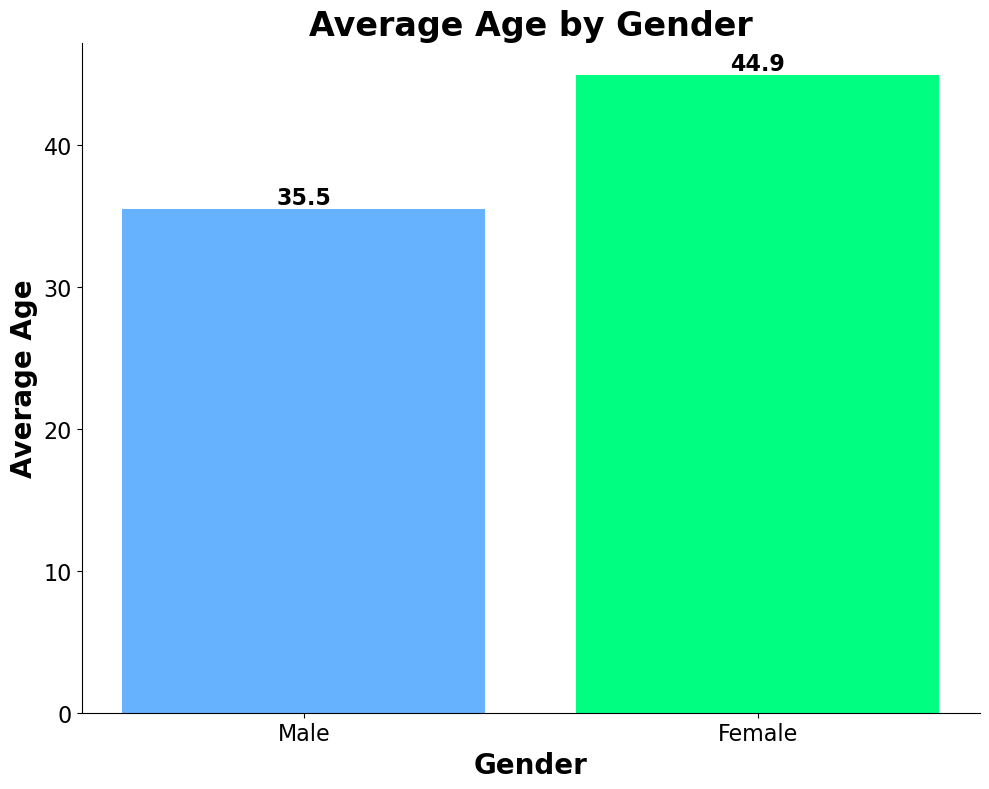

In [109]:
# Calculate the average age for males and females
male_average_age = df[df['Gender'] == 'Male']['Age'].mean()
female_average_age = df[df['Gender'] == 'Female']['Age'].mean()

# Define custom colors for Male and Female
colors = ['#66B2FF', '#00FF80']

# Plot the bar graph with defined colors for the average age by gender
fig, ax = plt.subplots(figsize=(10, 8))
ax.bar(['Male', 'Female'], [male_average_age, female_average_age], color=colors)

# Set the title and font size
ax.set_title('Average Age by Gender', fontsize=24, fontweight='bold')

# Set the y-axis label and font size
ax.set_ylabel('Average Age', fontsize=20, fontweight='bold')

# Set the x-axis label and font size
ax.set_xlabel('Gender', fontsize=20, fontweight='bold')

# Increase the font size for both y-axis and x-axis tick labels
ax.tick_params(axis='both', labelsize=16)

# Display the average age on each bar
for index, value in enumerate([male_average_age, female_average_age]):
    ax.text(index, value, f'{value:.1f}', ha='center', va='bottom', fontsize=16, fontweight='bold')

# Remove top and right spines to make the plot cleaner
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.tight_layout()
plt.show()

# Analyze the Quality of Sleep based on the age and gender of participants:
The data shows that female participants have the best quality of sleep at the rank of 9 and male participants have the worst quality of sleep

In [98]:
# Find the index of the best sleep quality
best_sleep_quality_index = df['Quality of Sleep'].idxmax()
best_sleep_quality_gender = df.loc[best_sleep_quality_index, 'Gender']

# Find the index of the worst sleep quality
worst_sleep_quality_index = df['Quality of Sleep'].idxmin()
worst_sleep_quality_gender = df.loc[worst_sleep_quality_index, 'Gender']

# Display the results
print(f"Gender with the best quality of sleep: {best_sleep_quality_gender}")
print(f"Gender with the worst quality of sleep: {worst_sleep_quality_gender}")

Gender with the best quality of sleep: Female
Gender with the worst quality of sleep: Male


In [99]:
best_sleep_quality_index = df['Quality of Sleep'].idxmax()
best_sleep_quality_age = df.loc[best_sleep_quality_index, 'Age']

# Find the index of the worst sleep quality
worst_sleep_quality_index = df['Quality of Sleep'].idxmin()
worst_sleep_quality_age = df.loc[worst_sleep_quality_index, 'Age']

# Calculate the average age for best and worst sleep quality
average_age_best_sleep_quality = df[df['Quality of Sleep'] == df['Quality of Sleep'].max()]['Age'].mean()
average_age_worst_sleep_quality = df[df['Quality of Sleep'] == df['Quality of Sleep'].min()]['Age'].mean()

# Display the results
print(f"Average age with the best quality of sleep: {average_age_best_sleep_quality:.2f}")
print(f"Average age with the worst quality of sleep: {average_age_worst_sleep_quality:.2f}")

Average age with the best quality of sleep: 52.66
Average age with the worst quality of sleep: 33.40


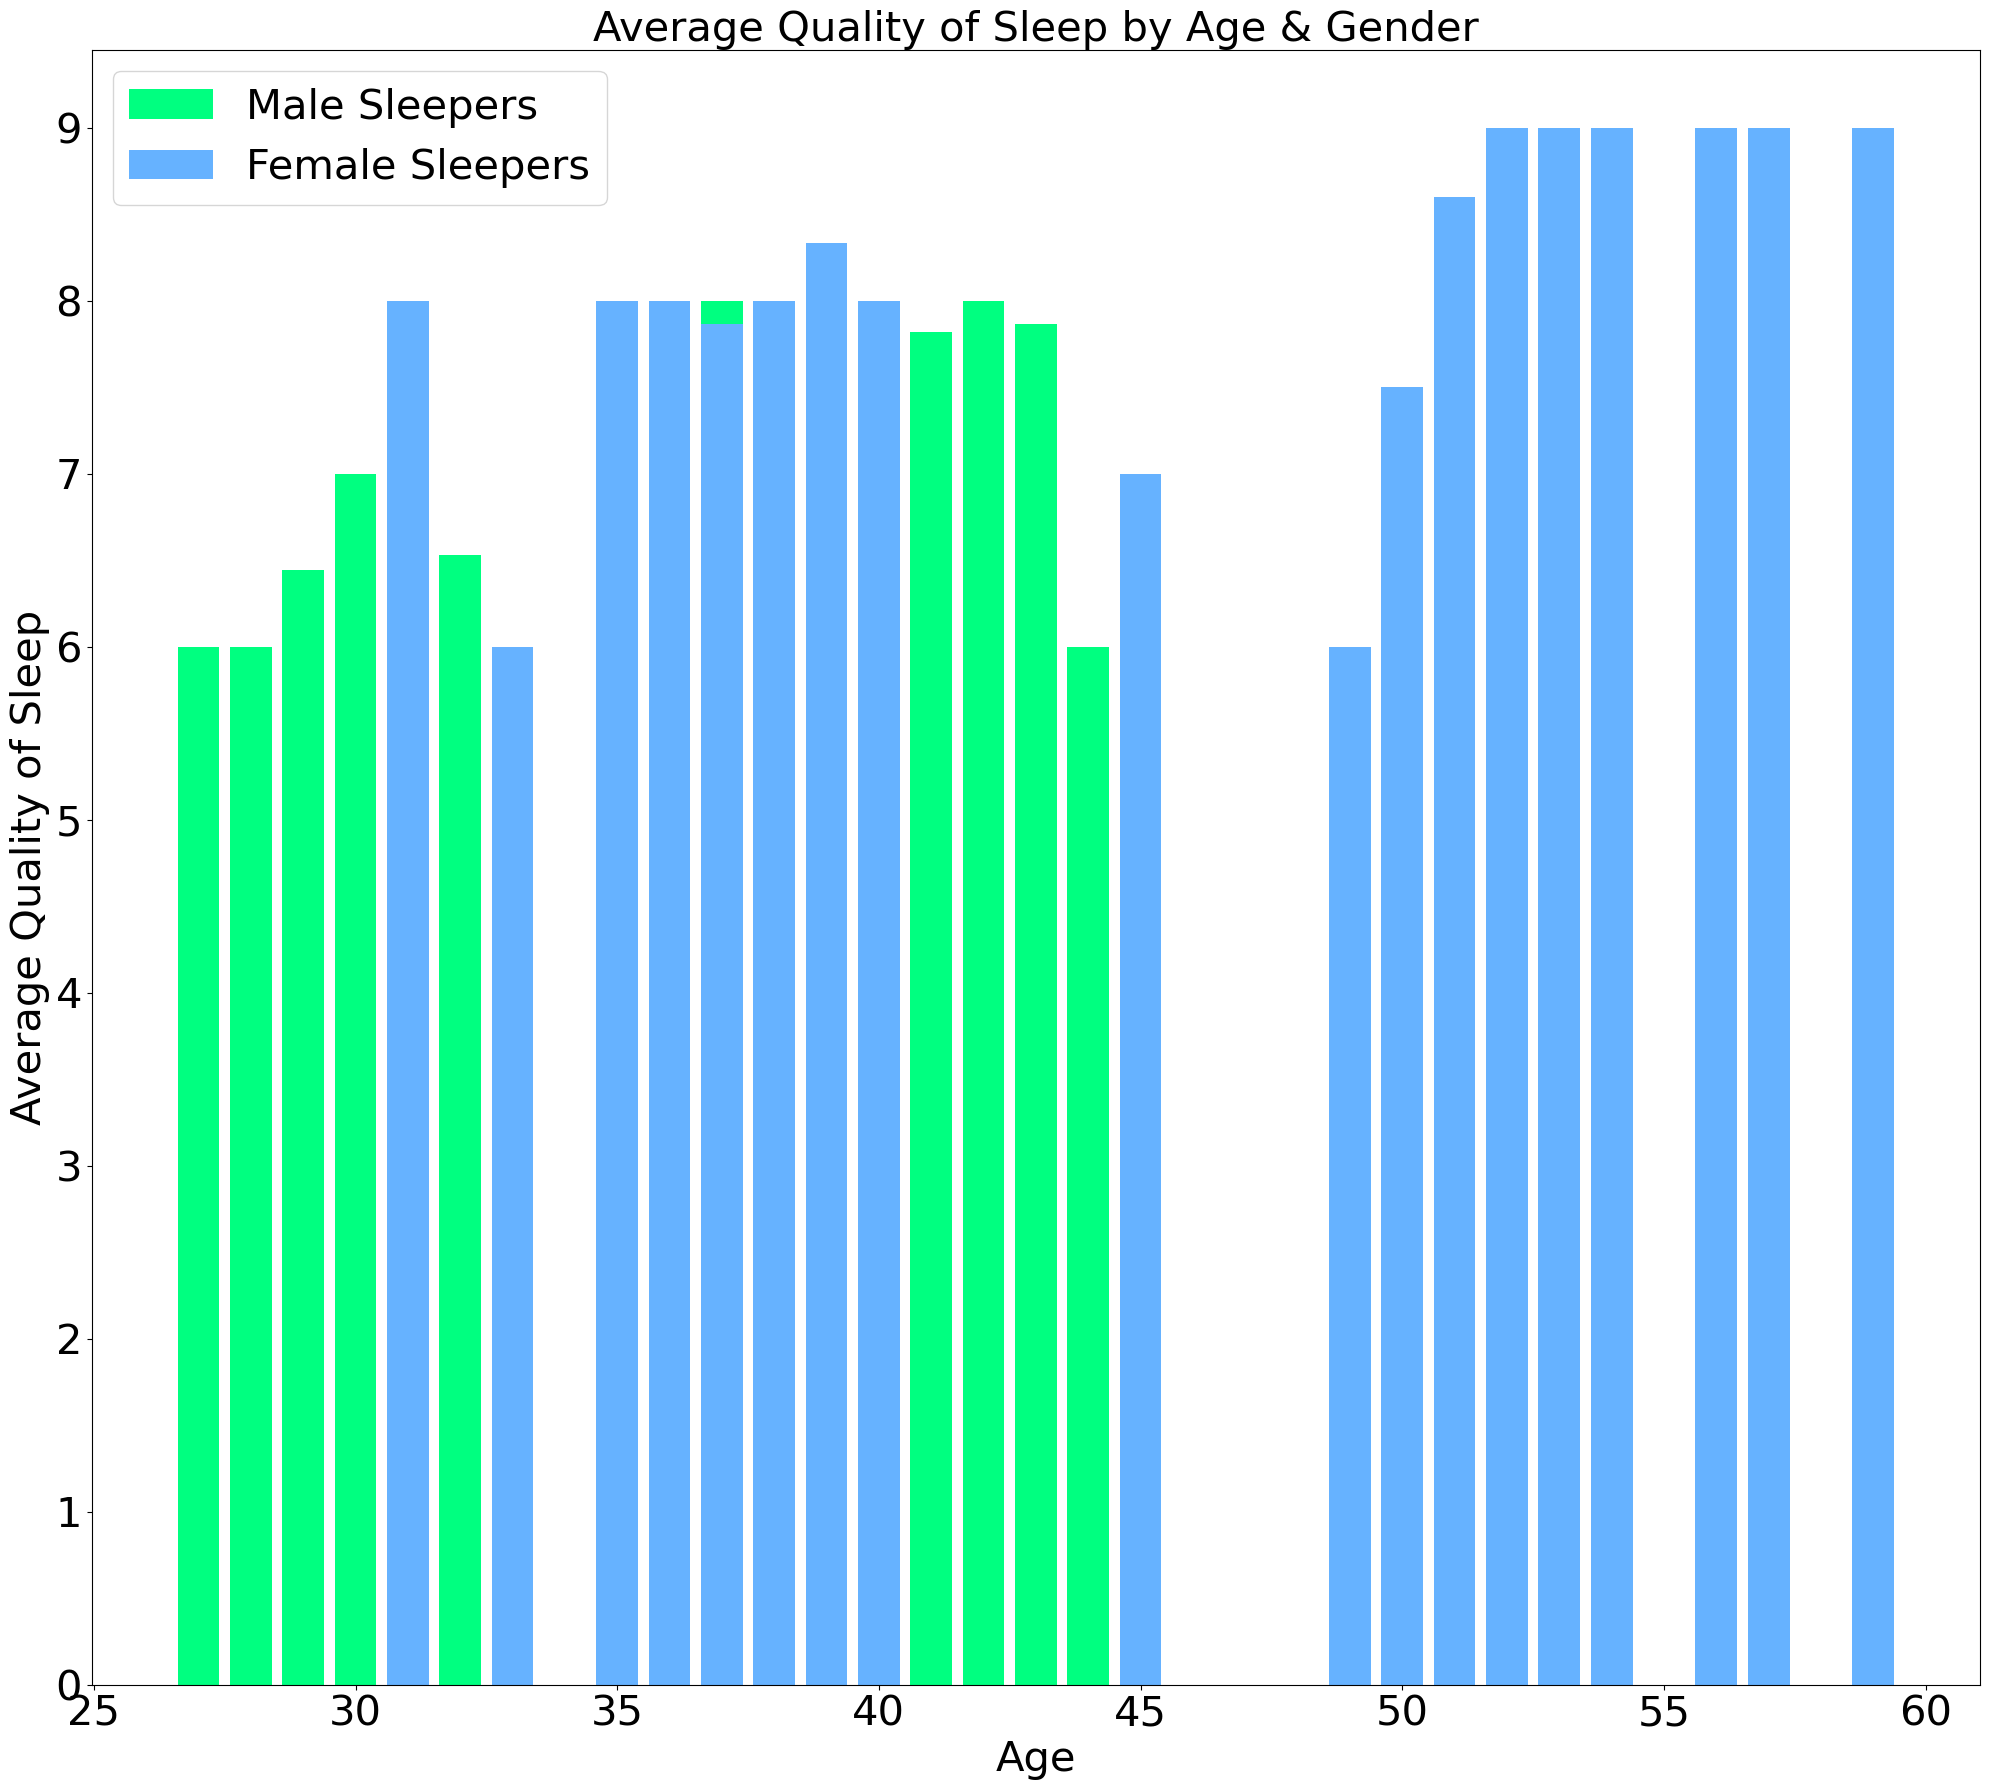

In [100]:
grouped_data = df.groupby('Age').agg({'Quality of Sleep': 'mean'})

# Find Male and Female sleepers
male_sleepers = df[df['Gender'] == 'Male'].groupby('Age').agg({'Quality of Sleep': 'mean'})
female_sleepers = df[df['Gender'] == 'Female'].groupby('Age').agg({'Quality of Sleep': 'mean'})

# Define custom colors for Male and Female
colors = ['#66B2FF', '#00FF80']

# Plot the bar chart with defined colors for the overall grouped data
fig, ax = plt.subplots(figsize=(20, 18))
ax.bar(grouped_data.index, grouped_data['Quality of Sleep'], color=colors[0])

# Create a bar graph with different colors for Male and Female sleepers
ax.bar(male_sleepers.index, male_sleepers['Quality of Sleep'], color=colors[1], label='Male Sleepers')
ax.bar(female_sleepers.index, female_sleepers['Quality of Sleep'], color=colors[0], label='Female Sleepers')

# Set the x-axis labels
ax.set_xlabel('Age', fontsize=30)
ax.set_ylabel('Average Quality of Sleep', fontsize=30)
ax.set_title('Average Quality of Sleep by Age & Gender', fontsize=30)

# Set more numbers for the y-axis
y_ticks = list(range(0, int(grouped_data['Quality of Sleep'].max()) + 1, 1))
ax.set_yticks(y_ticks)

# Increase the fontsize for both y-axis and x-axis tick labels
ax.set_yticklabels(y_ticks, fontsize=30)
ax.tick_params(axis='x', labelsize=30)

# Increase the legend fontsize
ax.legend(fontsize=30)

plt.tight_layout()
plt.show()

In [114]:
# Calculate the correlation coefficient between 'Quality of Sleep' and 'Age'
correlation_coefficient = df['Quality of Sleep'].corr(df['Age'])

print("Correlation Coefficient between Quality of Sleep and Age:", correlation_coefficient)

Correlation Coefficient between Quality of Sleep and Age: 0.7259438341841769


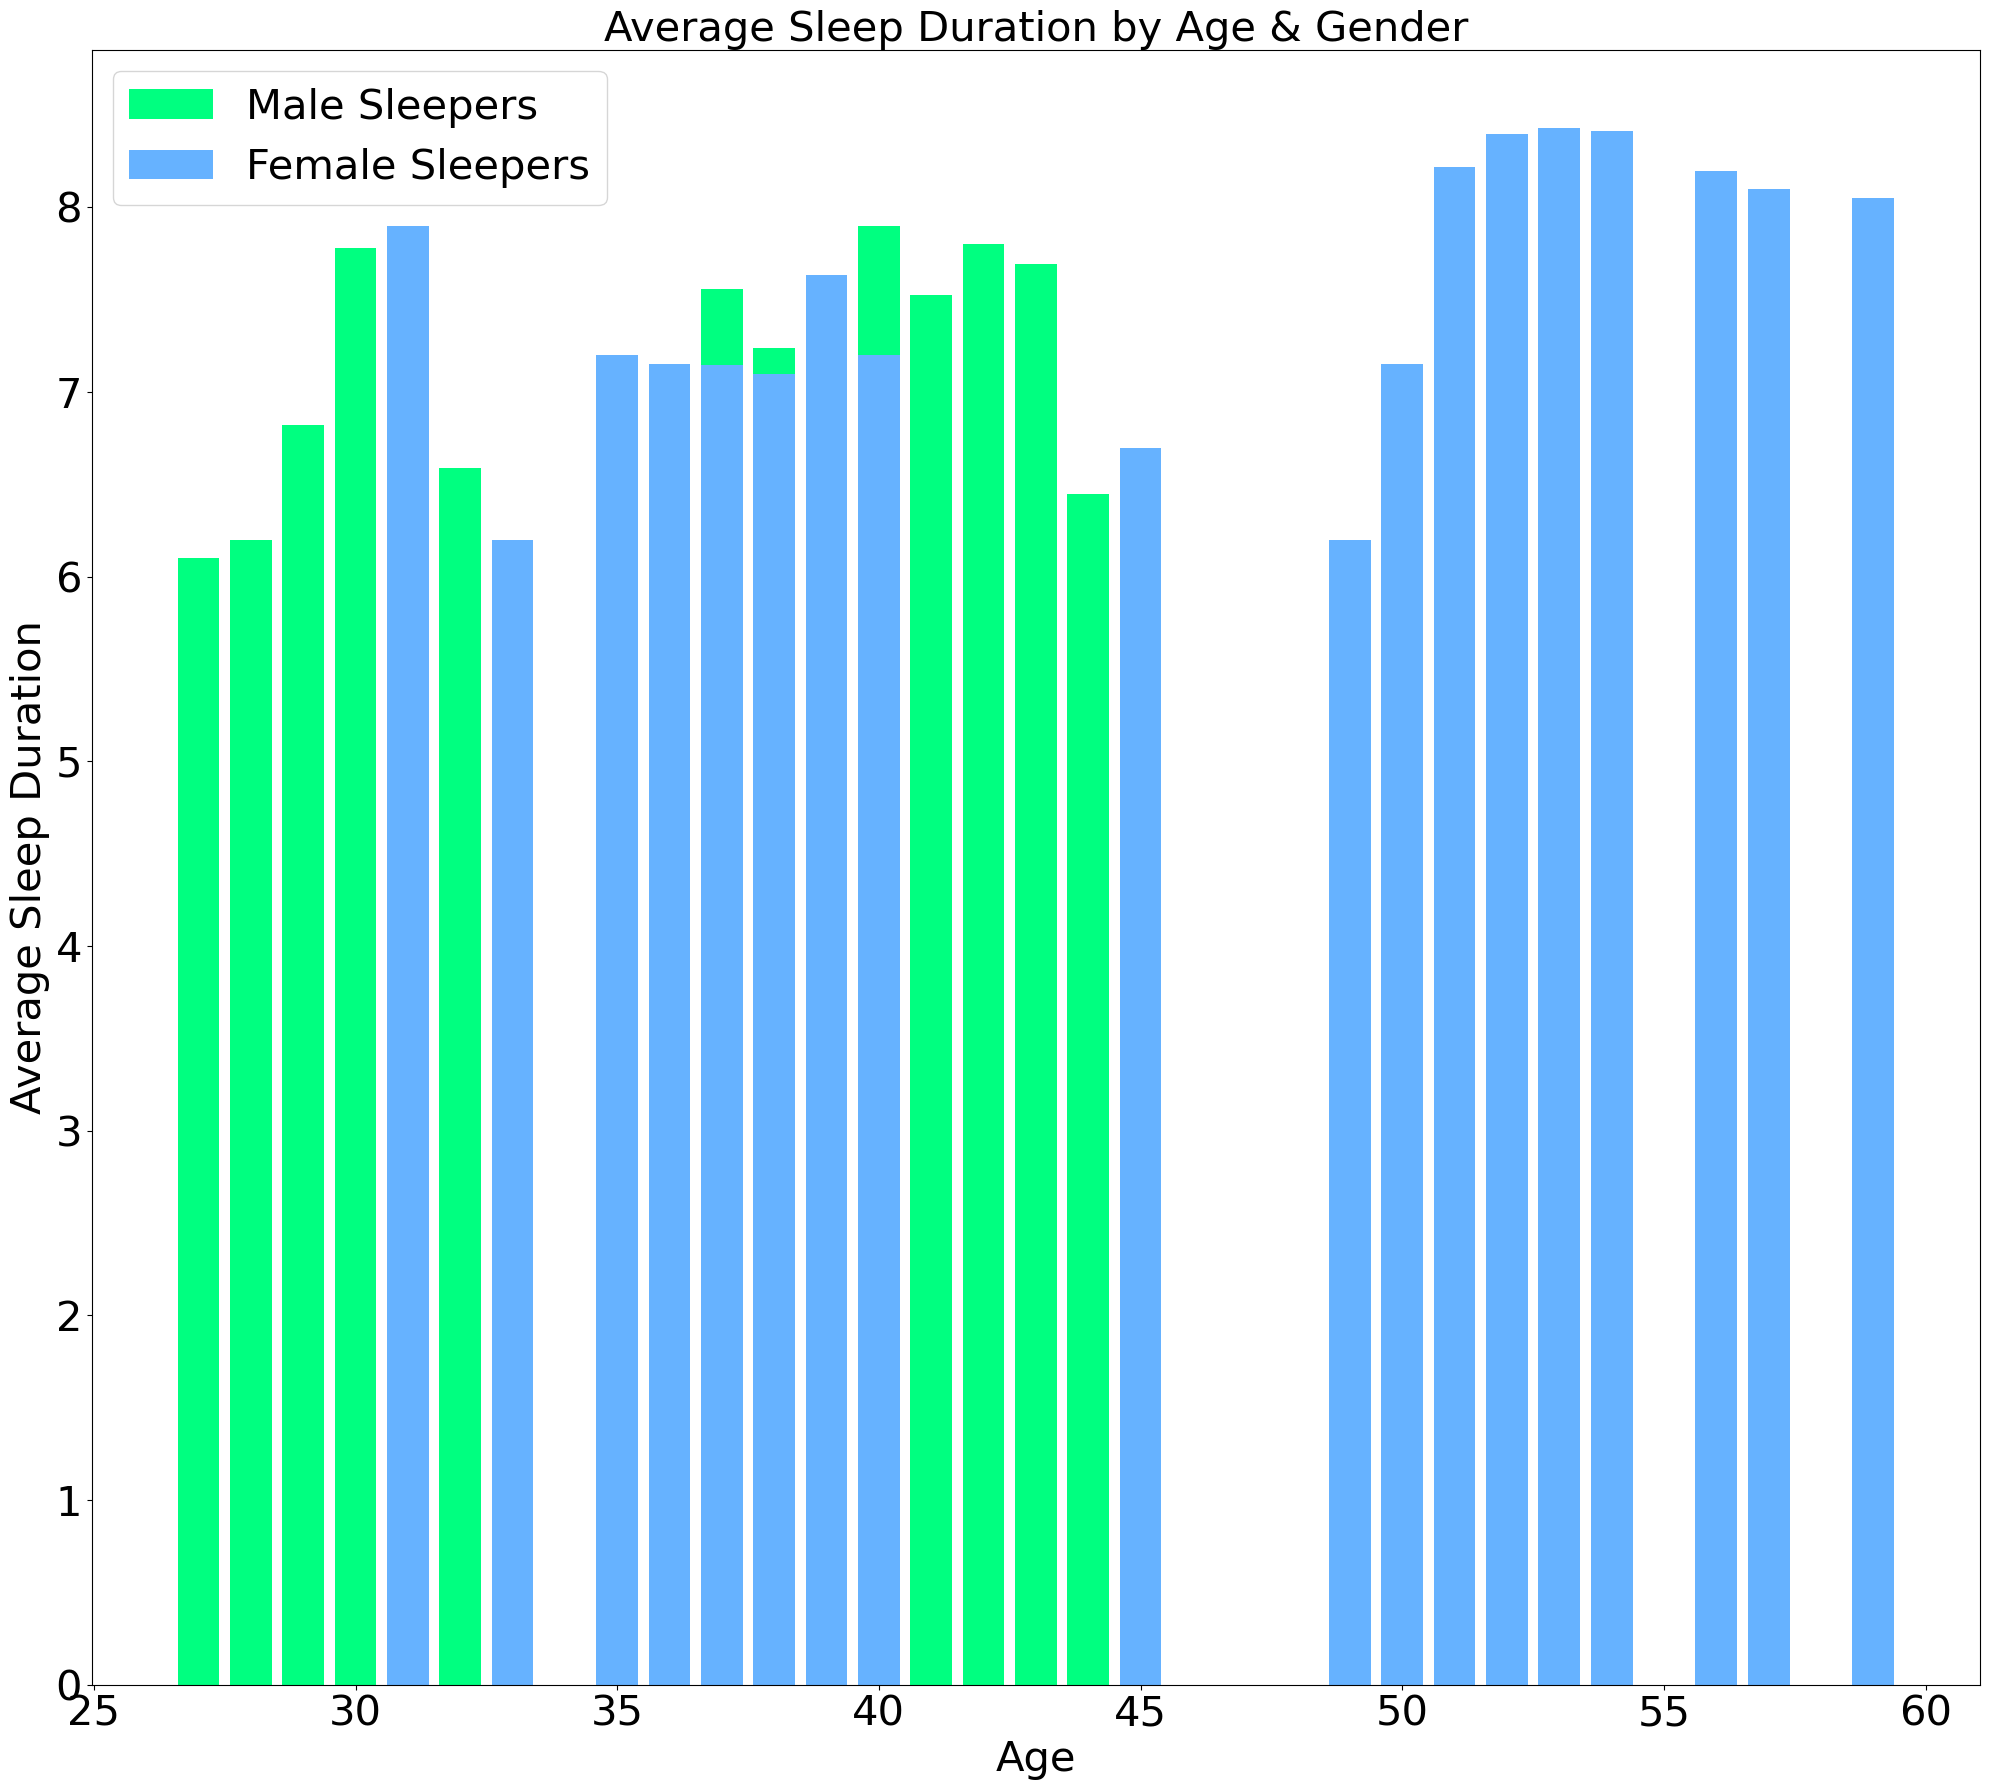

In [111]:
grouped_data = df.groupby('Age').agg({'Sleep Duration': 'mean'})

# Find Male and Female sleepers
male_sleepers = df[df['Gender'] == 'Male'].groupby('Age').agg({'Sleep Duration': 'mean'})
female_sleepers = df[df['Gender'] == 'Female'].groupby('Age').agg({'Sleep Duration': 'mean'})

# Define custom colors for Male and Female
colors = ['#66B2FF', '#00FF80']

# Plot the bar chart with defined colors for the overall grouped data
fig, ax = plt.subplots(figsize=(20, 18))
ax.bar(grouped_data.index, grouped_data['Sleep Duration'], color=colors[0])

# Create a bar graph with different colors for Male and Female sleepers
ax.bar(male_sleepers.index, male_sleepers['Sleep Duration'], color=colors[1], label='Male Sleepers')
ax.bar(female_sleepers.index, female_sleepers['Sleep Duration'], color=colors[0], label='Female Sleepers')

# Set the x-axis labels
ax.set_xlabel('Age', fontsize=30)
ax.set_ylabel('Average Sleep Duration', fontsize=30)
ax.set_title('Average Sleep Duration by Age & Gender', fontsize=30)

# Set more numbers for the y-axis
y_ticks = list(range(0, int(grouped_data['Sleep Duration'].max()) + 1, 1))
ax.set_yticks(y_ticks)

# Increase the fontsize for both y-axis and x-axis tick labels
ax.set_yticklabels(y_ticks, fontsize=30)
ax.tick_params(axis='x', labelsize=30)

# Increase the legend fontsize
ax.legend(fontsize=30)

plt.tight_layout()
plt.show()

In [96]:
# Calculate the correlation coefficient of 'Sleep Duration' and 'Age'
correlation_coefficient = df['Sleep Duration'].corr(df['Age'])

# Print the result
print("Correlation Coefficient of Sleep Duration and Age:")
print(correlation_coefficient)

Correlation Coefficient of Sleep Duration and Age:
0.6001844782941137


# Breakdown of each visualization by Age and Gender

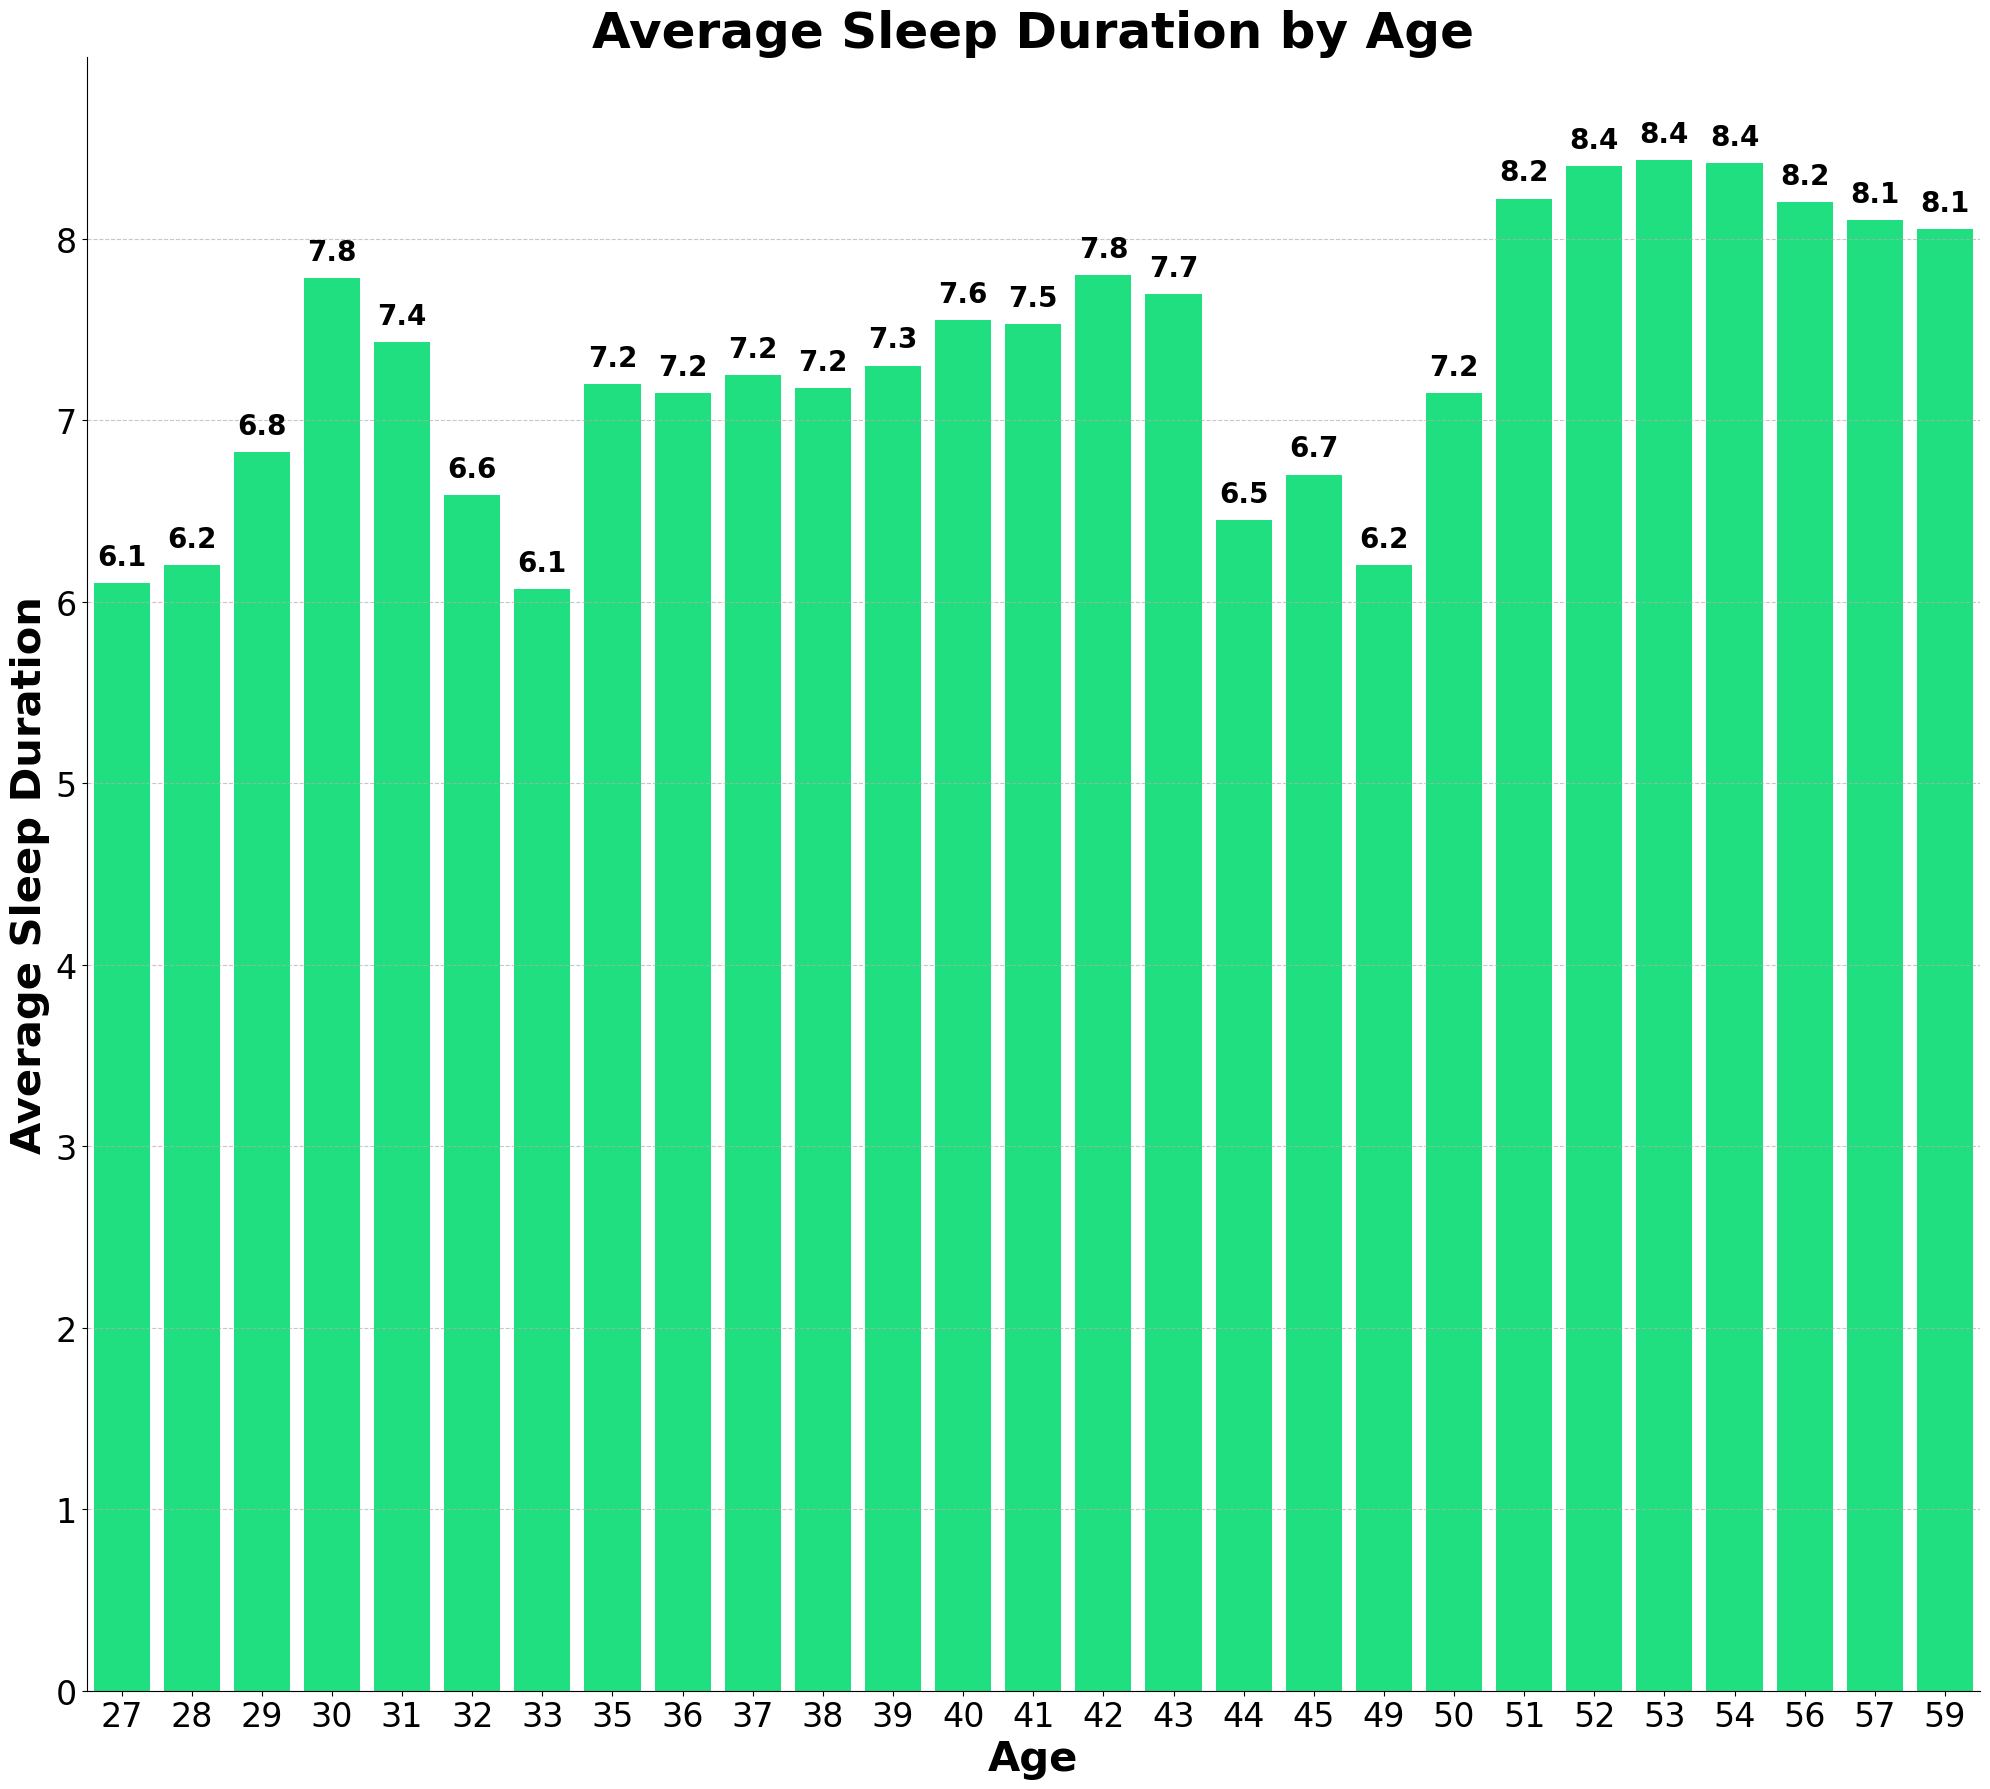

In [112]:
grouped_data = df.groupby('Age').agg({'Sleep Duration': 'mean'})

# Set up a custom color palette for the plot
custom_palette = sns.color_palette(['#00FF80'])

# Plot the bar chart for the average sleep duration by age using Seaborn for a better style
fig, ax = plt.subplots(figsize=(20, 18))
sns.barplot(x=grouped_data.index, y='Sleep Duration', data=grouped_data, palette=custom_palette, ax=ax)

# Set plot title and axis labels
ax.set_title('Average Sleep Duration by Age', fontsize=36, fontweight='bold')
ax.set_xlabel('Age', fontsize=30, fontweight='bold')
ax.set_ylabel('Average Sleep Duration', fontsize=30, fontweight='bold')

# Set more numbers for the y-axis and adjust the y-axis limits
y_ticks = list(range(0, int(grouped_data['Sleep Duration'].max()) + 1, 1))
ax.set_yticks(y_ticks)
ax.set_ylim(0, int(grouped_data['Sleep Duration'].max()) + 1)

# Increase the fontsize for both y-axis and x-axis tick labels
ax.tick_params(axis='both', labelsize=24)

# Display the average sleep duration on each bar
for index, value in enumerate(grouped_data['Sleep Duration']):
    ax.text(index, value + 0.1, f'{value:.1f}', ha='center', fontsize=20, fontweight='bold')

# Remove top and right spines to make the plot cleaner
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# Add a horizontal grid to improve readability
ax.yaxis.grid(True, linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

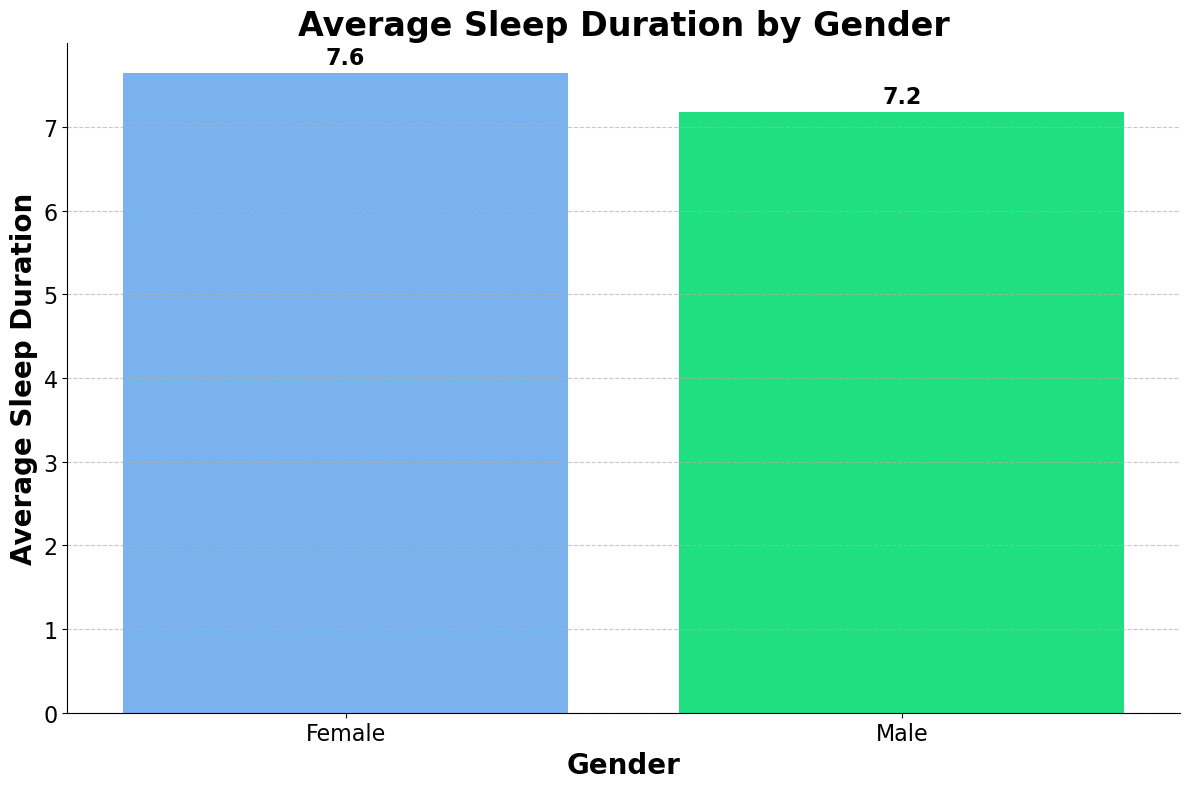

In [113]:
grouped_data = df.groupby('Gender').agg({'Sleep Duration': 'mean'}).reset_index()

# Set up a custom color palette for the plot
custom_palette = sns.color_palette(['#66B2FF', '#00FF80'])

# Plot the bar chart for the average sleep duration by gender using Seaborn for a better style
fig, ax = plt.subplots(figsize=(12, 8))
sns.barplot(x='Gender', y='Sleep Duration', data=grouped_data, palette=custom_palette, ax=ax)

# Set plot title and axis labels
ax.set_title('Average Sleep Duration by Gender', fontsize=24, fontweight='bold')
ax.set_xlabel('Gender', fontsize=20, fontweight='bold')
ax.set_ylabel('Average Sleep Duration', fontsize=20, fontweight='bold')

# Set more numbers for the y-axis and adjust the y-axis limits
y_ticks = list(range(0, int(grouped_data['Sleep Duration'].max()) + 1, 1))
ax.set_yticks(y_ticks)
ax.set_ylim(0, int(grouped_data['Sleep Duration'].max()) + 1)

# Increase the fontsize for both y-axis and x-axis tick labels
ax.tick_params(axis='both', labelsize=16)

# Display the average sleep duration on each bar
for index, value in enumerate(grouped_data['Sleep Duration']):
    ax.text(index, value + 0.1, f'{value:.1f}', ha='center', fontsize=16, fontweight='bold')

# Remove top and right spines to make the plot cleaner
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# Add a horizontal grid to improve readability
ax.yaxis.grid(True, linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

In [116]:
max_sleep_duration = df['Sleep Duration'].max()
print(max_sleep_duration)

8.5


In [117]:
min_sleep_duration = df['Sleep Duration'].min()
print(min_sleep_duration)

6.0


In [118]:
max_sleep_duration = df['Sleep Duration'].max()
longest_sleepers = df[df['Sleep Duration'] == max_sleep_duration]

# Select only the desired columns: Age, Gender, Quality of Sleep, and Sleep Duration
selected_columns = ['Age', 'Gender', 'Quality of Sleep', 'Sleep Duration']
longest_sleepers_selected = longest_sleepers.loc[:, selected_columns]

# Display the resulting DataFrame
print(longest_sleepers_selected.to_string(index=False))

 Age Gender  Quality of Sleep  Sleep Duration
  51 Female                 9             8.5
  51 Female                 9             8.5
  51 Female                 9             8.5
  51 Female                 9             8.5
  53 Female                 9             8.5
  53 Female                 9             8.5
  53 Female                 9             8.5
  53 Female                 9             8.5
  53 Female                 9             8.5
  53 Female                 9             8.5
  53 Female                 9             8.5
  53 Female                 9             8.5
  54 Female                 9             8.5


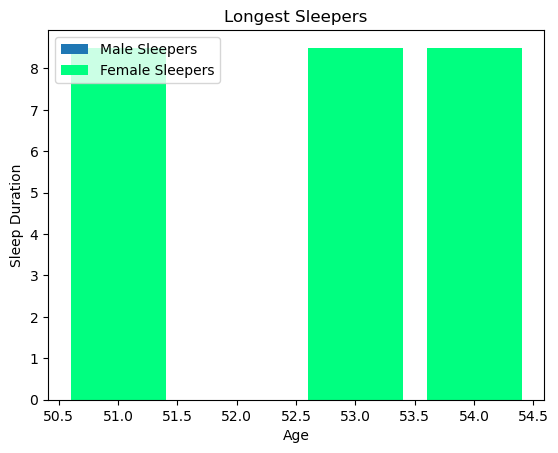

In [119]:
max_sleep_duration = df['Sleep Duration'].max()

# Filter the DataFrame to get only the rows with the longest sleep duration
longest_sleepers = df[df['Sleep Duration'] == max_sleep_duration]

# Separate data for Male and Female
male_sleepers = longest_sleepers[longest_sleepers['Gender'] == 'Male']
female_sleepers = longest_sleepers[longest_sleepers['Gender'] == 'Female']

# Create a bar graph with different colors for Male and Female
plt.bar(male_sleepers['Age'], male_sleepers['Sleep Duration'], color='#66B2FF', label='Male Sleepers')
plt.bar(female_sleepers['Age'], female_sleepers['Sleep Duration'], color='#00FF80', label='Female Sleepers')

plt.title("Longest Sleepers")
plt.xlabel("Age")
plt.ylabel("Sleep Duration")
plt.legend()
plt.show()

In [120]:
avg_sleep_duration_quality_gender = df.groupby(['Age', 'Gender'])[['Sleep Duration', 'Quality of Sleep']].mean().reset_index()
print(avg_sleep_duration_quality_gender)

    Age  Gender  Sleep Duration  Quality of Sleep
0    27    Male        6.100000          6.000000
1    28    Male        6.200000          6.000000
2    29    Male        6.822222          6.444444
3    30    Male        7.781818          7.000000
4    31  Female        7.900000          8.000000
5    31    Male        7.400000          6.812500
6    32    Male        6.588235          6.529412
7    33  Female        6.200000          6.000000
8    33    Male        6.040000          6.000000
9    35  Female        7.200000          8.000000
10   35    Male        7.200000          7.800000
11   36  Female        7.150000          8.000000
12   37  Female        7.146667          7.866667
13   37    Male        7.560000          8.000000
14   38  Female        7.100000          8.000000
15   38    Male        7.240000          8.000000
16   39  Female        7.633333          8.333333
17   39    Male        7.200000          8.000000
18   40  Female        7.200000          8.000000


In [121]:
male_sleepers = df[df['Gender'] == 'Male']

# Find the longest sleep duration for males
longest_sleep_duration_male = male_sleepers['Sleep Duration'].max()

print("Longest Sleep Duration for Males:", longest_sleep_duration_male)

Longest Sleep Duration for Males: 7.9


In [122]:
female_sleepers = df[df['Gender'] == 'Female']

# Find the longest sleep duration for males
longest_sleep_duration_female = female_sleepers['Sleep Duration'].max()

print("Longest Sleep Duration for Females:", longest_sleep_duration_female)

Longest Sleep Duration for Females: 8.5


In [123]:
min_sleep_duration = df['Sleep Duration'].min()
shortest_sleepers = df[df['Sleep Duration'] == min_sleep_duration]

# Select only the desired columns: Age, Gender, Quality of Sleep, and Sleep Duration
selected_columns = ['Age', 'Gender', 'Quality of Sleep', 'Sleep Duration']
shortest_sleepers_selected = shortest_sleepers.loc[:, selected_columns]

# Display the resulting DataFrame
print(shortest_sleepers_selected.to_string(index=False))

 Age Gender  Quality of Sleep  Sleep Duration
  29   Male                 6             6.0
  29   Male                 6             6.0
  29   Male                 6             6.0
  32   Male                 6             6.0
  32   Male                 6             6.0
  32   Male                 6             6.0
  32   Male                 6             6.0
  32   Male                 6             6.0
  32   Male                 6             6.0
  32   Male                 6             6.0
  33   Male                 6             6.0
  33   Male                 6             6.0
  33   Male                 6             6.0
  33   Male                 6             6.0
  33   Male                 6             6.0
  33   Male                 6             6.0
  50 Female                 6             6.0


In [124]:
male_sleepers = df[df['Gender'] == 'Male']

# Find the longest sleep duration for males
shortest_sleep_duration_male = male_sleepers['Sleep Duration'].min()

print("Shortest Sleep Duration for Males:", shortest_sleep_duration_male)

Shortest Sleep Duration for Males: 6.0


In [126]:
female_sleepers = df[df['Gender'] == 'Female']

# Find the longest sleep duration for males
shortest_sleep_duration_female = female_sleepers['Sleep Duration'].min()

print("Shortest Sleep Duration for Females:", shortest_sleep_duration_female)

Shortest Sleep Duration for Females: 6.0
